# MACHINE LEARNING: BÀI THỰC HÀNH PHẦN MÔ HÌNH PERCEPTRON.


## Ví dụ 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

Hiển thị dữ liệu để quan sát

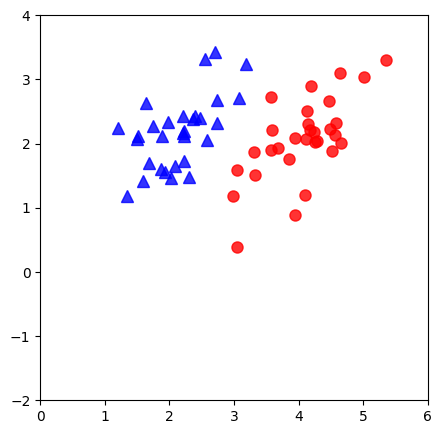

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))

ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [4]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

Hàm kiểm tra điều kiện dừng

In [5]:
# Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) # True if h(w, X) == y else False

Vòng lặp chính tìm đường phân chia (bộ hệ số W) theo phương pháp Gradient Descent

In [6]:
def perceptron(X, y, w_init):
  w = [w_init]
  N = X.shape[1]
  mis_points = [] # set of miss position points
  while True:
    # mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
        xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
        yi = y[0, mix_id[i]]
        if h(w[-1], xi)[0] != yi:
            mis_points.append(mix_id[i])
            w_new = w[-1] + yi*xi

            w.append(w_new)

    if has_converged(X, y, w[-1]):
        break
  return (w, mis_points)

Gọi hàm lặp và in ra kết quả là bộ trọng số W ở vòng lặp cuối

In [7]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])
w[-1].shape

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


(3, 1)

Xây dựng phương thức vẽ đường phân chia để quan sát kết quả

In [8]:
def draw_line(w):
  w0, w1, w2 = w[0], w[1], w[2]
  if w2 != 0:
    x11, x12 = -100, 100
    return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
  else:
    x10 = -w0/w1
    return plt.plot([x10, x10], [-100, 100], 'k')

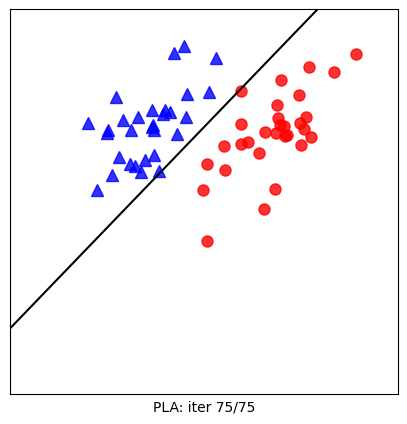

In [9]:
## Visualization

def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 = i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill=False)
            ax.add_artist(circle)
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

viz_alg_1d_2(w)

## Ví dụ 2

Đọc dữ liệu

In [10]:
main_df = pd.read_csv('/content/drive/MyDrive/sonar.all-data.csv', header=None)

main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


Kiểm tra độ cân bằng của dữ liệu bằng cách nhóm theo cột cuối cùng (chỉ số cột là 60 – tính
từ không), tức là cột đầu ra y:

<Axes: ylabel='60'>

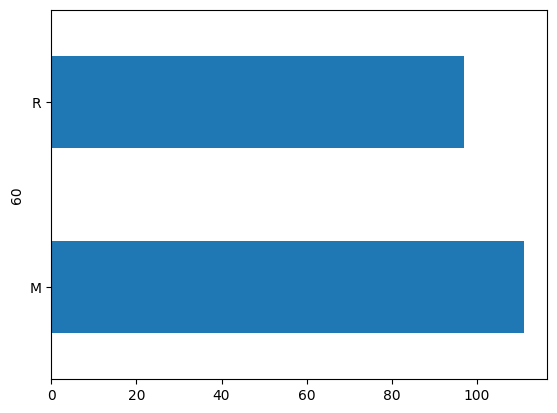

In [11]:
main_df[60].value_counts().plot(kind='barh')

Đoạn chương trình dưới đây đổi nhãn của đầu ra y từ {‘M’, ‘R’} sang {1, -1} (tức là M ứng với class 1;
R ứng với class -1)

In [12]:
y_df = main_df[60]
target_label = {'M': 1,'R': -1}
target_df = [target_label[item] for item in y_df]
print(target_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Lấy phần dữ liệu quan sát (bỏ cột 60)

In [13]:
inputs_df = main_df.drop(60, axis=1)

Sau đó bổ sung cột thêm trường dữ liệu x0 = 1 vào bên trái

In [14]:
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

Số chiều dữ liệu hiện tại sẽ là 61 (trường) x 208 (bản ghi). Chúng ta chia dữ liệu thành tập train : test với
tỷ lệ là 7:3

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target_df, test_size=0.3, random_state=42)

## Bài tập tự thực hành:

In [16]:
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, np.array(y_train).reshape(-1, 1).T, w_init)

In [17]:
w[-1].shape

(61, 1)

In [18]:
y_pred = np.sign(np.dot(X_test, w[-1]))

y_pred

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:   ', recall_score(y_test, y_pred))

Accuracy:  0.7777777777777778
Precision: 0.7837837837837838
Recall:    0.8285714285714286


## Ví dụ 3

Dữ liệu có 569 bản ghi (mẫu), với 30 thuộc tính. Bệnh nhân được chia làm hai loại: u lành tính (B –
Begnin) có 357 mẫu và u ác tính (M – Malignant) có 212 mẫu.

In [19]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])

print(cancer_data.data.shape)
#target set
print(cancer_data.target)


cancer_data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,
                                                    cancer_data.target, test_size=0.3, random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

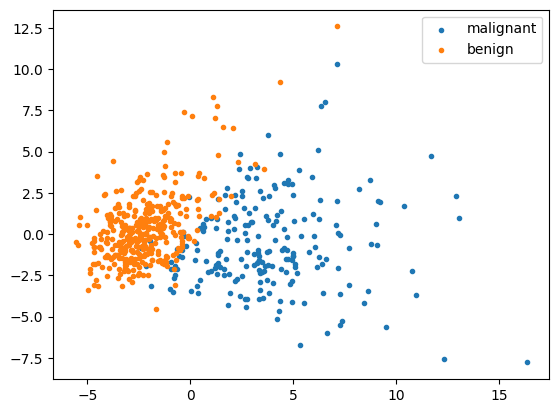

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
sc = StandardScaler()
transformed = pd.DataFrame(pca.fit_transform(sc.fit_transform(cancer_data.data)))

plt.scatter(transformed[cancer_data.target == 0][0], transformed[cancer_data.target == 0][1], s=9, label='malignant')
plt.scatter(transformed[cancer_data.target == 1][0], transformed[cancer_data.target == 1][1], s=9, label='benign')
plt.legend()
plt.show()

In [21]:
from sklearn.linear_model import Perceptron

pct = Perceptron()
pct.fit(X_train, y_train)

Perceptron()

In [22]:
y_pred = pct.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:   ', recall_score(y_test, y_pred))

Accuracy:  0.9473684210526315
Precision: 0.9541284403669725
Recall:    0.9629629629629629


In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [24]:
y_pred = logreg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:   ', recall_score(y_test, y_pred))

Accuracy:  0.9707602339181286
Precision: 0.9813084112149533
Recall:    0.9722222222222222


## Ví dụ 4

In [25]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/framingham.csv')

df.dropna(inplace=True)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Giảm số chiều dữ liệu xuống còn 02 chiều

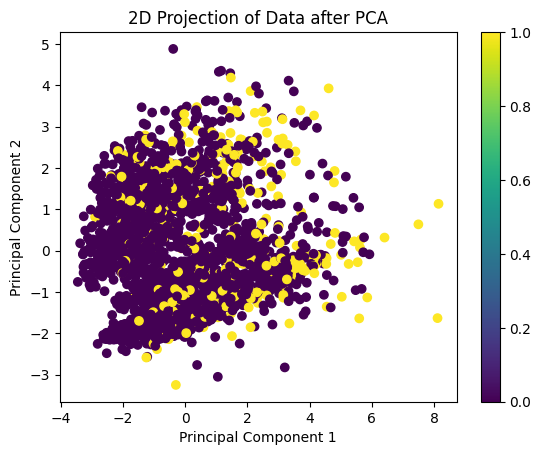

In [26]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data after PCA')
plt.colorbar()
plt.show()

### a. Perceptron

In [27]:
perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_train)

y_pred_perceptron = perceptron.predict(X_val_scaled)

accuracy_perceptron = accuracy_score(y_val, y_pred_perceptron)
precision_perceptron = precision_score(y_val, y_pred_perceptron)
recall_perceptron = recall_score(y_val, y_pred_perceptron)

print("Perceptron:")
print("Accuracy:", accuracy_perceptron)
print("Precision:", precision_perceptron)
print("Recall:", recall_perceptron)

Perceptron:
Accuracy: 0.7484047402005469
Precision: 0.23157894736842105
Recall: 0.25287356321839083


### b. Hồi quy Logistic

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_val_scaled)

accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)

print("Logistic Regression:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)

Logistic Regression:
Accuracy: 0.8468550592525068
Precision: 0.6071428571428571
Recall: 0.09770114942528736


### c. Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

y_pred_nb = naive_bayes.predict(X_val_scaled)

accuracy_nb = accuracy_score(y_val, y_pred_nb)
precision_nb = precision_score(y_val, y_pred_nb)
recall_nb = recall_score(y_val, y_pred_nb)

print("Naïve Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)

Naïve Bayes:
Accuracy: 0.8122151321786691
Precision: 0.3333333333333333
Recall: 0.1839080459770115


### Thực hiện với dữ liệu giảm chiều

In [30]:
# Sử dụng dữ liệu đã giảm chiều từ PCA
X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)


# Perception
perceptron_pca = Perceptron()
perceptron_pca.fit(X_train_pca, y_train)

y_pred_perceptron_pca = perceptron_pca.predict(X_val_pca)

accuracy_perceptron_pca = accuracy_score(y_val, y_pred_perceptron_pca)
precision_perceptron_pca = precision_score(y_val, y_pred_perceptron_pca)
recall_perceptron_pca = recall_score(y_val, y_pred_perceptron_pca)
print("Perceptron with PCA:")
print("Accuracy:", accuracy_perceptron_pca)
print("Precision:", precision_perceptron_pca)
print("Recall:", recall_perceptron_pca)


# LogisticRegression
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

y_pred_log_reg_pca = log_reg_pca.predict(X_val_pca)

accuracy_log_reg_pca = accuracy_score(y_val, y_pred_log_reg_pca)
precision_log_reg_pca = precision_score(y_val, y_pred_log_reg_pca)
recall_log_reg_pca = recall_score(y_val, y_pred_log_reg_pca)
print("\nLogistic Regression with PCA:")
print("Accuracy:", accuracy_log_reg_pca)
print("Precision:", precision_log_reg_pca)
print("Recall:", recall_log_reg_pca)


# GaussianNB
naive_bayes_pca = GaussianNB()
naive_bayes_pca.fit(X_train_pca, y_train)

y_pred_nb_pca = naive_bayes_pca.predict(X_val_pca)

accuracy_nb_pca = accuracy_score(y_val, y_pred_nb_pca)
precision_nb_pca = precision_score(y_val, y_pred_nb_pca)
recall_nb_pca = recall_score(y_val, y_pred_nb_pca)
print("\nNaïve Bayes with PCA:")
print("Accuracy:", accuracy_nb_pca)
print("Precision:", precision_nb_pca)
print("Recall:", recall_nb_pca)

Perceptron with PCA:
Accuracy: 0.7201458523245214
Precision: 0.1111111111111111
Recall: 0.10919540229885058

Logistic Regression with PCA:
Accuracy: 0.8413855970829535
Precision: 0.5
Recall: 0.028735632183908046

Naïve Bayes with PCA:
Accuracy: 0.8350045578851413
Precision: 0.41025641025641024
Recall: 0.09195402298850575


Mô hình chịu ảnh hưởng nhiều nhất khi giảm chiều dữ liệu là Perceptron vì mô hình không thể khảo sát tốt đủ không gian đặc trưng sau khi giảm chiều

## Ví dụ 5

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB

In [32]:
# 1. Đọc dữ liệu và chuẩn bị
data = pd.read_csv("/content/drive/MyDrive/Analysis-Portfolio-Task-Data.csv")

# Chuẩn hóa dữ liệu
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Store Type"] = le.fit_transform(data["Store Type"])


In [33]:
# Tách dữ liệu thành train và test
X = data.drop(["CustomerID", "Shopping Basket"], axis=1)
y = data["Shopping Basket"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Hồi quy tuyến tính

In [34]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_lr = model_lr.predict(X_test)
print("Độ chính xác hồi quy tuyến tính:", model_lr.score(X_test, y_test))

# Phân tích hệ số
print("Hệ số:", model_lr.coef_)

Độ chính xác hồi quy tuyến tính: 0.7241269422333318
Hệ số: [-0.51739894  0.24915953  1.98962835  1.15139863  1.13038871  2.86382812]


3. Phân loại khách hàng

In [35]:
# a. Perceptron
model_perceptron = Perceptron()
y_train_binary = (y_train > 50).astype(int)
model_perceptron.fit(X_train, y_train_binary)
y_pred_perceptron = model_perceptron.predict(X_test)
print("Độ chính xác Perceptron:", accuracy_score(y_test > 50, y_pred_perceptron))

Độ chính xác Perceptron: 0.6


In [36]:
# b. Hồi quy Logistic
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train_binary)
y_pred_logistic = model_logistic.predict(X_test)
print("Độ chính xác Hồi quy Logistic:", accuracy_score(y_test > 50, y_pred_logistic))

Độ chính xác Hồi quy Logistic: 1.0


In [37]:
# c. Naïve Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train_binary)
y_pred_nb = model_nb.predict(X_test)
print("Độ chính xác Naïve Bayes:", accuracy_score(y_test > 50, y_pred_nb))

Độ chính xác Naïve Bayes: 0.9333333333333333
